In [2]:
#Import and configure required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

# Exploratory data analysis of Haberman's Survival Dataset.

# Load dataset using Pandas

In [4]:

df = pd.read_csv(r"C:\Users\Nitin\Downloads\haberman.csv")

In [5]:
df.columns =["Age","Year","Nodes","Survival"]

In [6]:
df.shape

(305, 4)

In [5]:
df.index

RangeIndex(start=0, stop=305, step=1)

In [6]:
df.columns

Index(['Age', 'Year', 'Nodes', 'Survival'], dtype='object')

In [7]:
df.dtypes

Age         int64
Year        int64
Nodes       int64
Survival    int64
dtype: object

# Dataset metadata

In [8]:
df.info

<bound method DataFrame.info of      Age  Year  Nodes  Survival
0     30    62      3         1
1     30    65      0         1
2     31    59      2         1
3     31    65      4         1
4     33    58     10         1
..   ...   ...    ...       ...
300   75    62      1         1
301   76    67      0         1
302   77    65      3         1
303   78    65      1         2
304   83    58      2         2

[305 rows x 4 columns]>

# Insights from metadata
Non-null count for all features is equal to the number of records, hence the dataset contains no missing values, and there's no need for data imputation.

All features are of int64 data type. Since status is a binary feature, we have to convert its type.

The dataset contains no headers so we have to generate them.

Pandas generated a default index column.

The dataset memory usage (RAM) is ~10kb.


# Dataset taxonomy
Our dataset contains 305 records and 4 features, including 1 class attribute (status).

-Age of patient at time of operation (continuous)

-Patient's year of operation (year - 1900, discrete)

-Number of positive axillary nodes detected (continuous)

-Survival status (binary)

-1 = the patient survived 5 years or longer

-2 = the patient died within 5 years


In [10]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# Objective
Our objective is to find patterns in the dataset to better comprehend the data, and leverage it to choose a machine learning algorithm for predicting survival rates of patients undergoing surgery.

In [11]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
df.nunique()

Age         49
Year        12
Nodes       31
Survival     2
dtype: int64

In [13]:
df.count()

Age         305
Year        305
Nodes       305
Survival    305
dtype: int64

In [14]:
df.isnull()

,Age,Year,Nodes,Survival
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
300,False,False,False,False
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False


In [16]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [17]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

# We will not remove the duplicates, as this can be a genuine possibility..

# 1.Survival

In [18]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [19]:
df.Survival.value_counts(normalize=True)

Survival
1    0.734426
2    0.265574
Name: proportion, dtype: float64

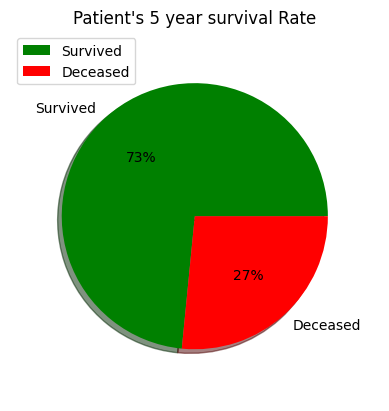

In [22]:
slices = df['Survival'].value_counts()

plt.pie(x=slices, labels=['Survived', 'Deceased'],shadow=True,colors=["g","r"],radius=0.9, autopct="%1.0f%%")
plt.title("Patient's 5 year survival Rate")
plt.savefig("01. Patients 5 year survival rate.png")
plt.legend(loc=2)
plt.show()

# Insights from high-level descriptive statistics
From the total of 305 patient records, 224 patients survived 5 years or more after surgery, and 81 patients deceased in 5 years or less after surgery.

This dataset is imbalanced since ~73% of records belong to the survivors class, and ~27% belongs to the deceased class.

# Exploratory data analysis
 Univarite analysis
 
# 2.Patient's age

In [23]:
df['Age'].describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

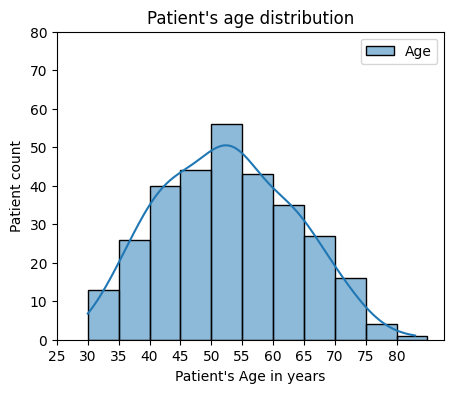

In [26]:
plt.figure(figsize=(5,4))

sns.histplot(df, x="Age", label="Age", bins=9,binwidth=5, kde=True)

plt.xlabel("Patient's Age in years")
plt.ylabel("Patient count")
plt.title("Patient's age distribution")
plt.xticks(ticks=range(25, 85, 5))
plt.yticks(ticks=range(0, 90, 10))
plt.legend()

plt.savefig("02. Patient's age distribution.png")
plt.show()

# The maximum people who were oprated where in the age group of 50 to 55

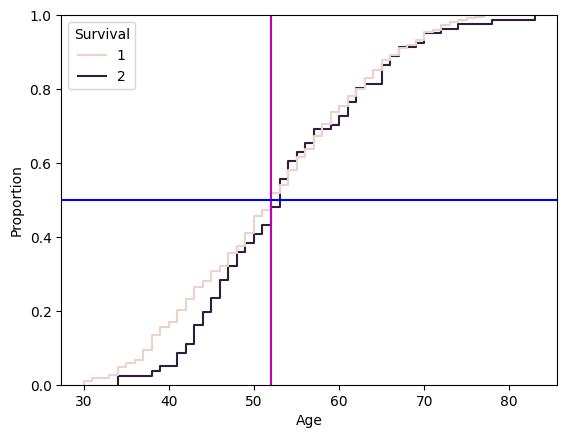

In [33]:
sns.ecdfplot(x="Age",data=df,hue="Survival")
plt.axvline(52,c="m")
plt.axhline(0.5,c="b")

plt.savefig("04. ECDF of patients age.png")
plt.show()

# 80% of the people were 65 years or below.
# 50% of the people were 52 years or below.

# 3. operation year

In [35]:
df["Year"].describe()

count    305.000000
mean      62.849180
std        3.254078
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: Year, dtype: float64

<Axes: xlabel='Year'>

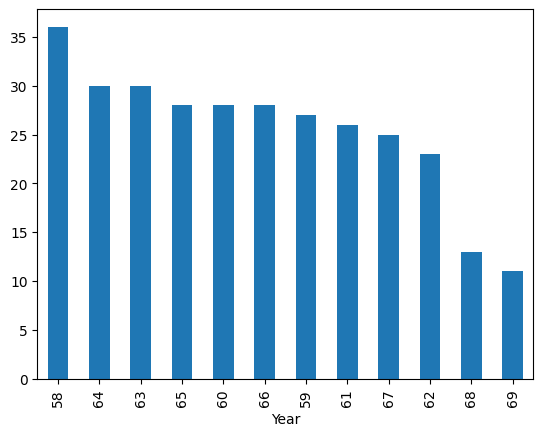

In [37]:
df.Year.value_counts().plot(kind="bar")

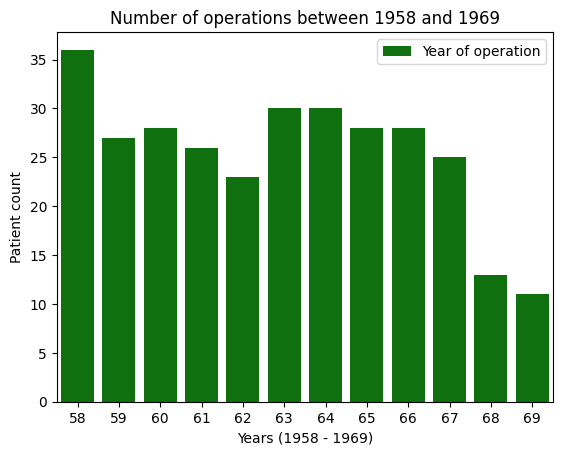

In [40]:
sns.countplot(data=df, x="Year", label="Year of operation", color="g")
plt.xlabel("Years (1958 - 1969)")
plt.ylabel("Patient count")
plt.title("Number of operations between 1958 and 1969")
plt.legend()

plt.savefig("04. Number of operations between 1958 and 1969.png")
plt.show()

# 4.Lymph Nodes

In [41]:
df.Nodes.describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

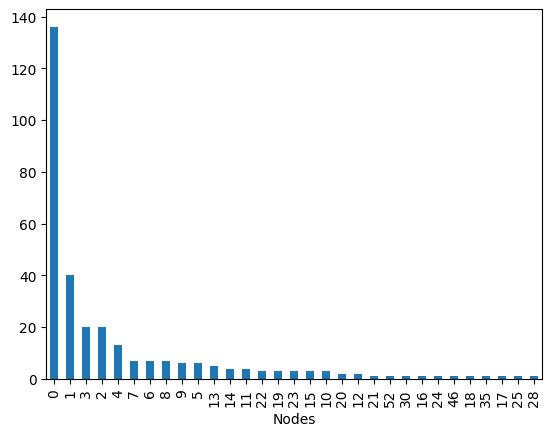

In [44]:
df.Nodes.value_counts().plot(kind="bar")

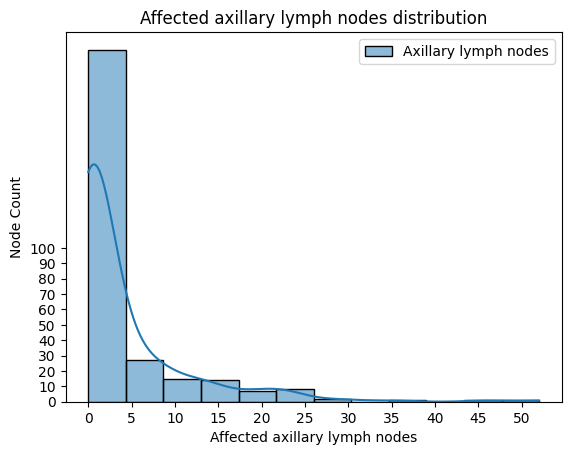

In [47]:
sns.histplot(df,x="Nodes", kde=True, label="Axillary lymph nodes", bins=12)
plt.xlabel("Affected axillary lymph nodes")
plt.ylabel("Node Count")
plt.title("Affected axillary lymph nodes distribution")
plt.xticks(ticks=range(0, 55, 5))
plt.yticks(ticks=range(0, 101, 10))
plt.legend()

plt.savefig("05. Affected axillary lymph nodes distribution.png")
plt.show()

# maximum density count for node isbetween 0 and 10

# 5.Bivariate analysis

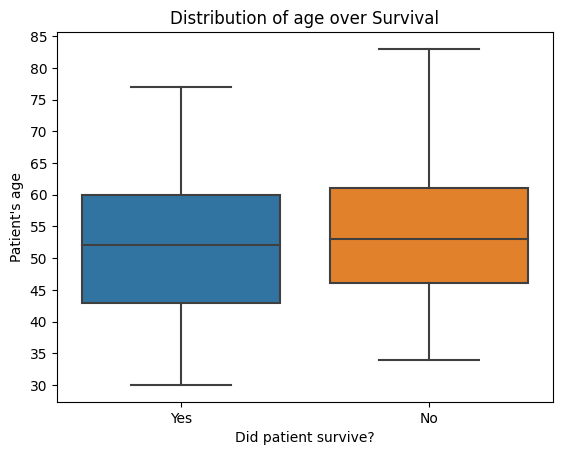

In [49]:
sns.boxplot(data=df, x="Survival", y="Age")

plt.title("Distribution of age over Survival")
plt.xlabel("Did patient survive?")
plt.ylabel("Patient's age")
plt.xticks(ticks=[0, 1], labels=["Yes", "No"])
plt.yticks(ticks=range(30, 90, 5))

plt.savefig("06. Distribution age over Survival.png")
plt.show()

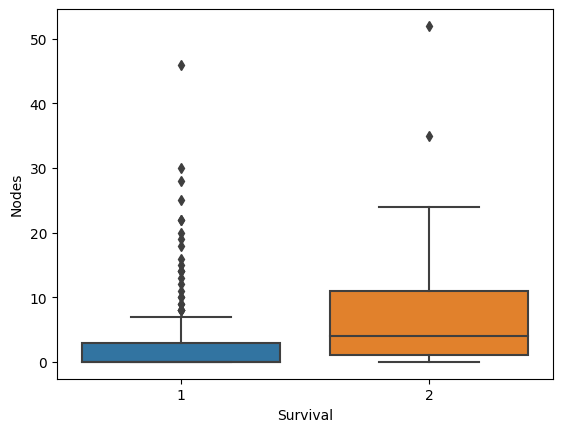

In [13]:
sns.boxplot(data=df, x="Survival", y="Nodes")
plt.show()

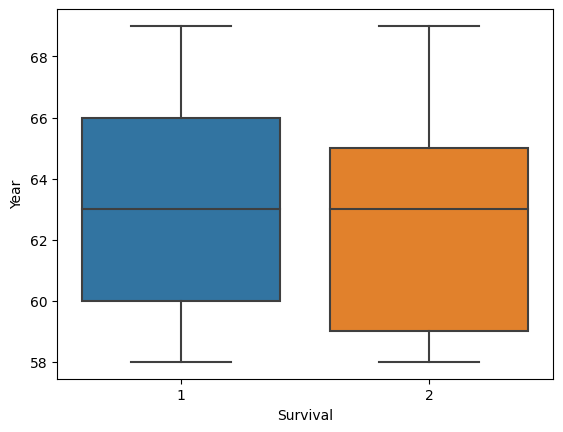

In [14]:
sns.boxplot(data=df, x="Survival", y="Year")
plt.show()

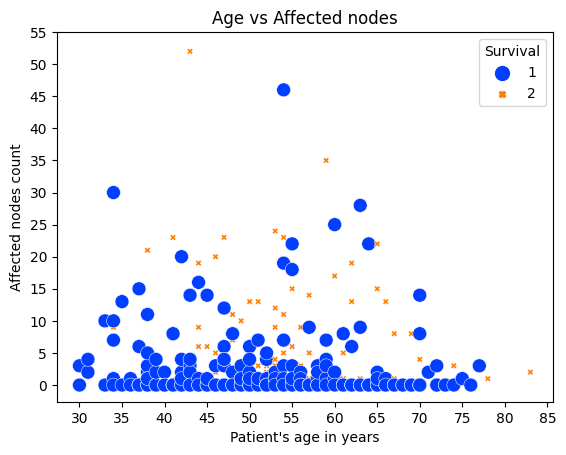

In [21]:
sns.scatterplot(
        data=df,
        x="Age",
        y="Nodes",
        hue="Survival",
        palette="bright",
        style="Survival",
        size="Survival",
        markers=["o", "X"],
        sizes=(100, 20),
    )
plt.title("Age vs Affected nodes")
plt.xlabel("Patient's age in years")
plt.ylabel("Affected nodes count")
plt.xticks(ticks=range(30, 90, 5))
plt.yticks(ticks=range(0, 60, 5))

plt.savefig("07. Age vs affected nodes.png")
plt.show()

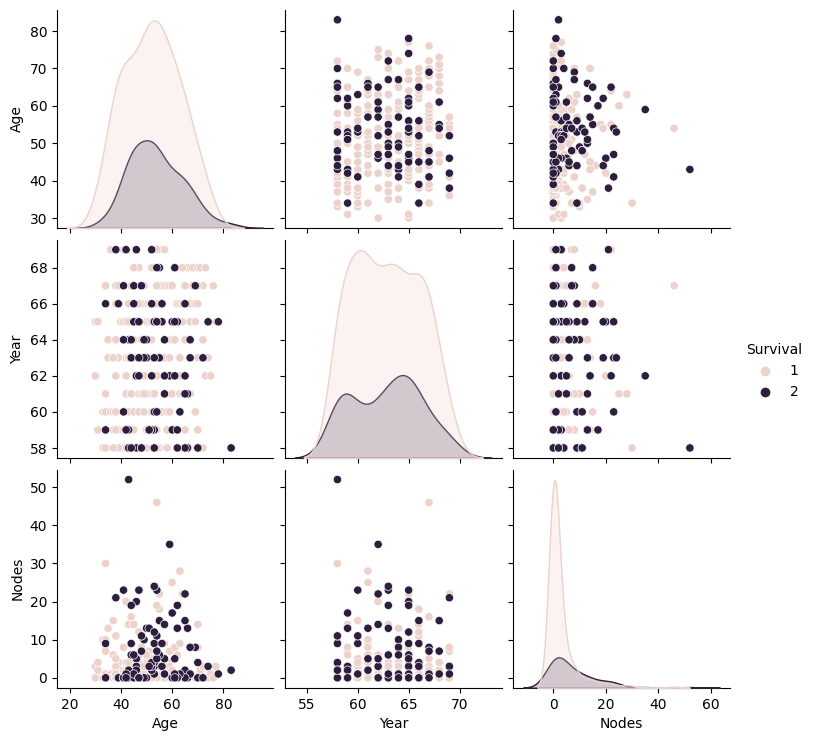

In [26]:
sns.pairplot(
    df.sort_values("Survival", ascending=True),
    hue="Survival"
)
plt.savefig("08. Correlation between features.png")
plt.show()